<a href="https://colab.research.google.com/github/huynth1801/Basic-DIP/blob/master/1810177_THC4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
def visualization(*args):
  num_x = 1 + args[2][0] + args[2][1]
  if (len(args) >= 4):
    fig, axes = plt.subplots(num_x, len(args[0]), figsize=(20,15))
  else:
    fig, axes = plt.subplots(num_x, len(args[0]), figsize=(20,15))
  for i in range(len(args[0])):
    j = 0
    axes[j][i].imshow(args[0][i], cmap='gray', vmin=0, vmax=255)
    if args[2][0] == 1:
      j += 1
      axes[j][i].hist(args[0][i].ravel(), 256, [0,256], label='PDF')
      if args[2][2] == 1:
        ax2 = axes[j][i].twinx()
        ax2.hist(args[0][i].ravel(),256, [0,256], cumulative=True, histtype='step', color = 'red', label='CDF')
      axes[j][i].set_title("Histogram-CDF", fontsize=15)


      if args[2][1] == 1:
        j += 1
        f = np.fft.fft2(args[0][i])
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        axes[j][i].imshow(magnitude_spectrum, cmap='gray')

      if (len(args) >= 2):
        j = 0
        axes[0][i].set_title(args[1][i], fontsize=15)
        if args[2][0] == 1:
          j += 1
          axes[j][i].set_title("Histogram " + args[1][i], fontsize=15)
        if args[2][1] == 1:
          j += 1
          axes[j][i].set_title('Spectrum ' + args[1][i], fontsize=15)

  fig.tight_layout()


# Log transformations

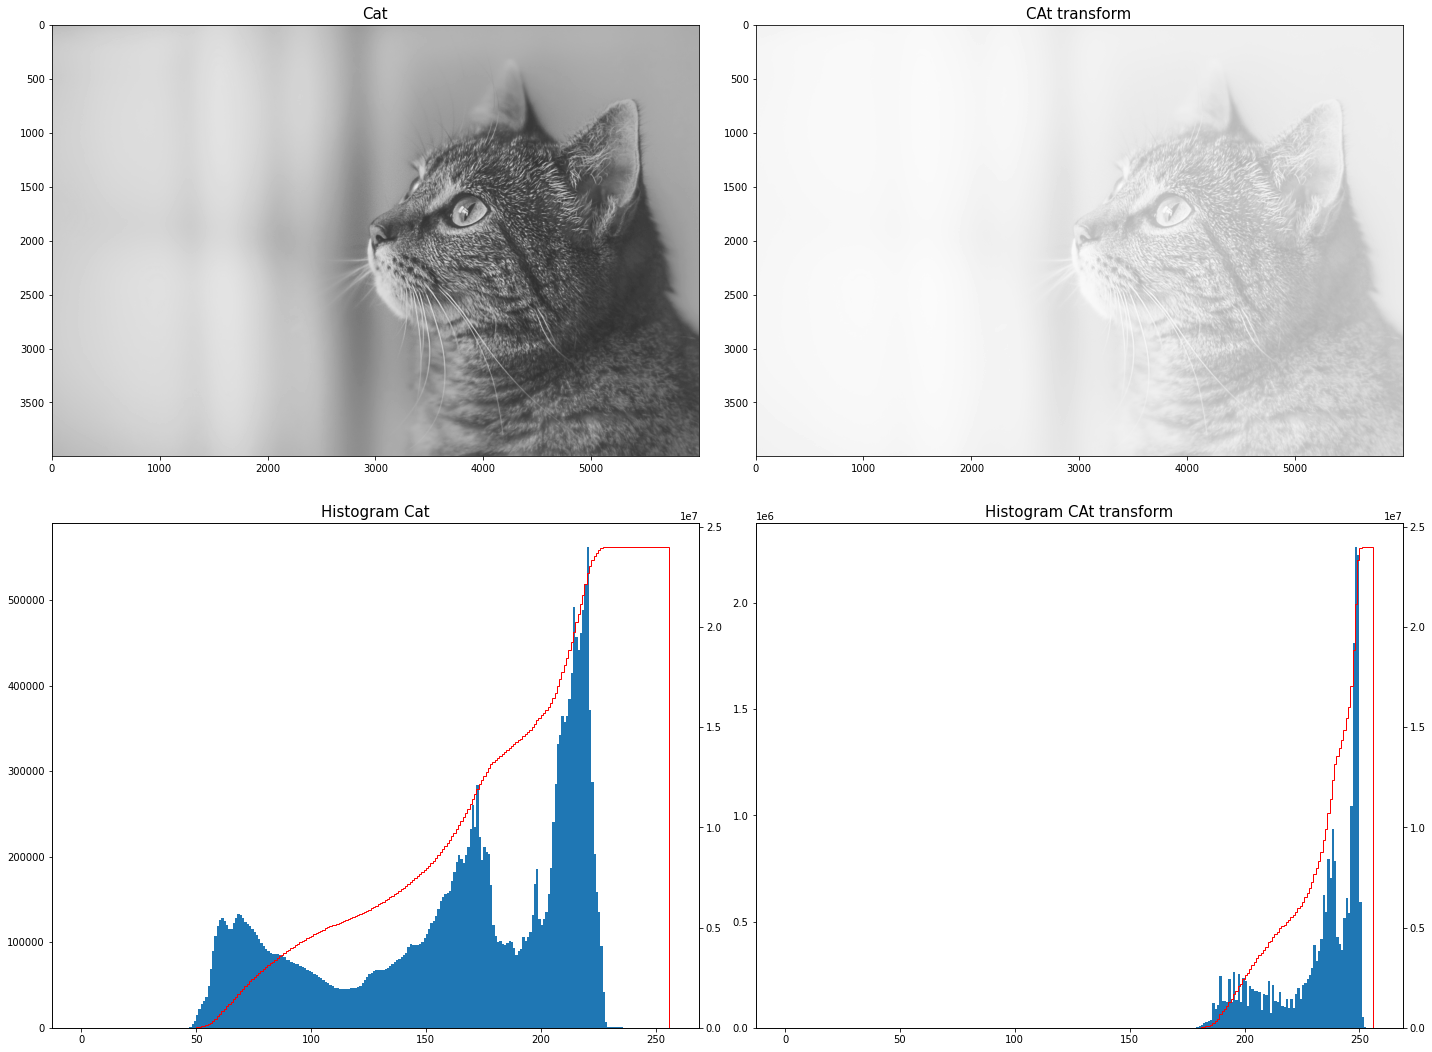

In [ ]:
cat_gray = cv2.imread('/content/james-sutton-dQ5G0h7sLno-unsplash.jpg',0)
c = 255/(np.log(1 + np.max(cat_gray)))
cat_transformed = c * np.log(1 + cat_gray)
cat_transformed = np.array(cat_transformed, dtype = np.uint8)

visualization([cat_gray, cat_transformed],['Cat', 'Cat transform'],[1,0,1])

# Adjust gamma

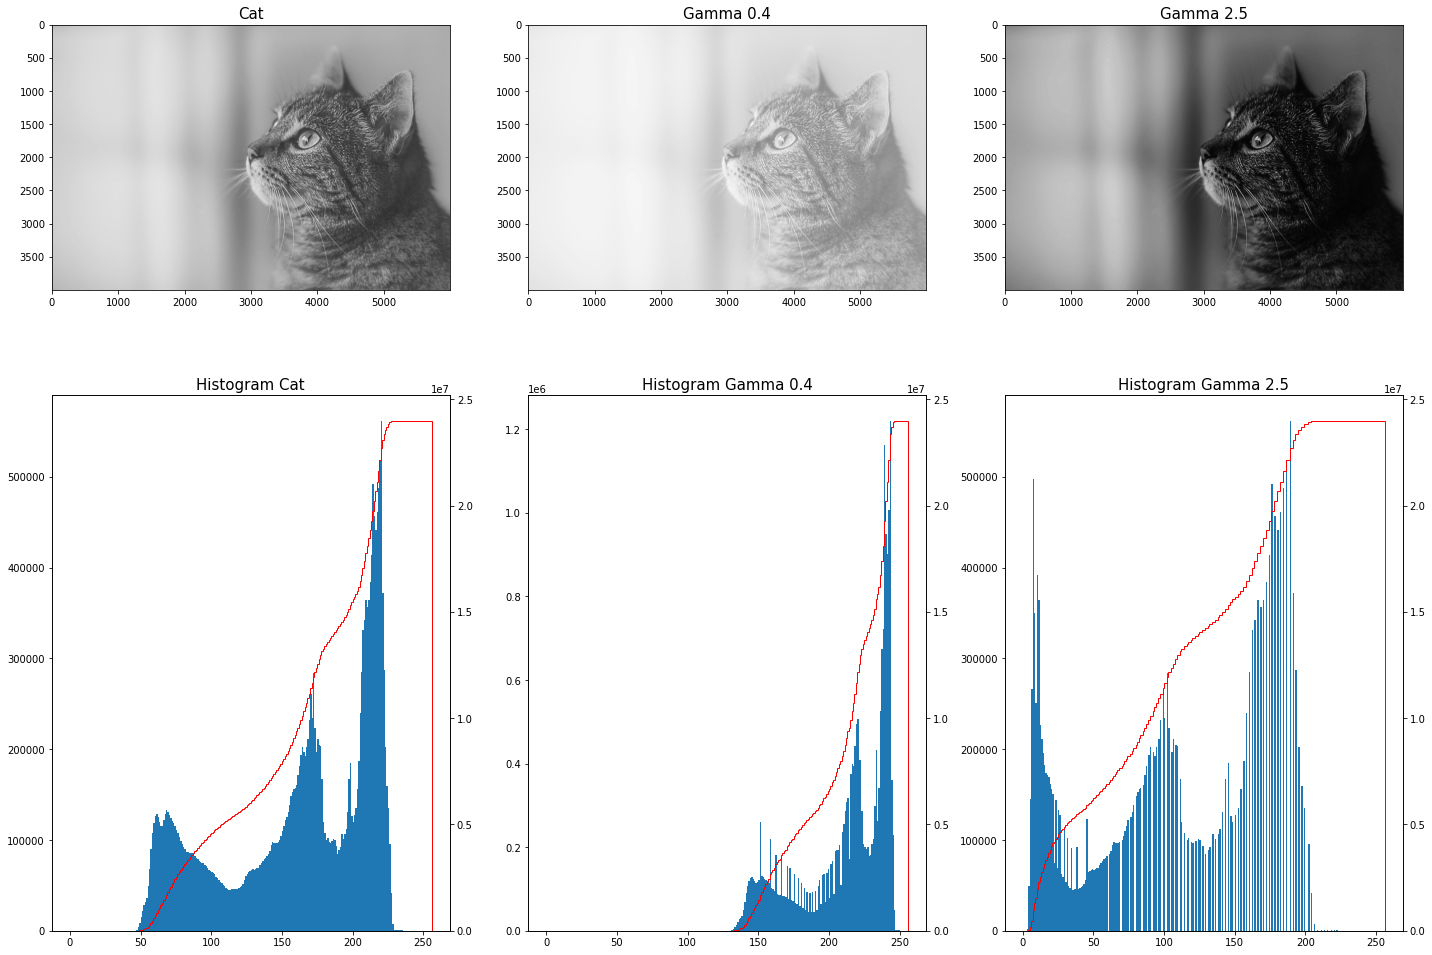

In [ ]:
gamma = 0.4
c = 255 / (cat_gray.max()**gamma)
dst2 = c * (cat_gray)**gamma
dst2 = dst2.astype(np.uint8)

gamma = 2.5
c = 255 / (cat_gray.max()**gamma)
dst3 = c * (cat_gray)**gamma
dst3 = dst3.astype(np.uint8)

visualization([cat_gray, dst2, dst3],['Cat','Gamma 0.4','Gamma 2.5'],[1,0,1],[15,12])

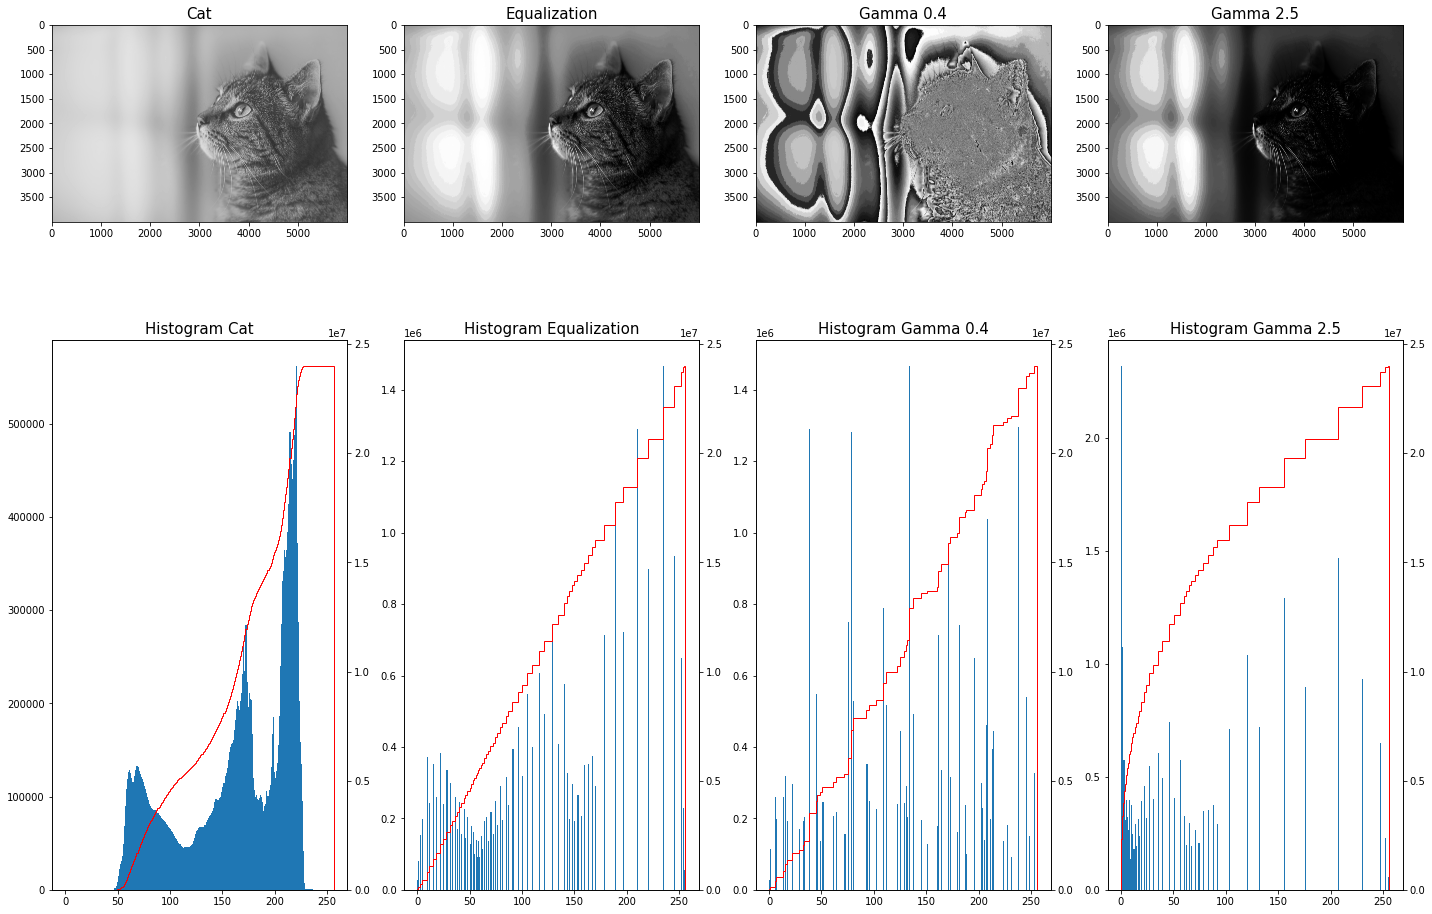

In [ ]:
new_image = cat_gray/255 * 100 + 150
new_image = new_image.astype(np.uint8)

dst = cv2.equalizeHist(new_image)

# Gamma 0.4
gamma = 0.4
c = 255-(dst.max()**gamma)
dst2 = c * (dst)**gamma
dst2 = dst2.astype(np.uint8)

#Gamma 2.5
gamma = 2.5
c = 255/(dst.max()**gamma)
dst3 = c * (dst)**gamma
dst3 = dst3.astype(np.uint8)

visualization([cat_gray, dst, dst2, dst3],['Cat','Equalization','Gamma 0.4','Gamma 2.5'],[1,0,1],[18,10])


#PIECEWISE-LINEAR TRANSFORMATION

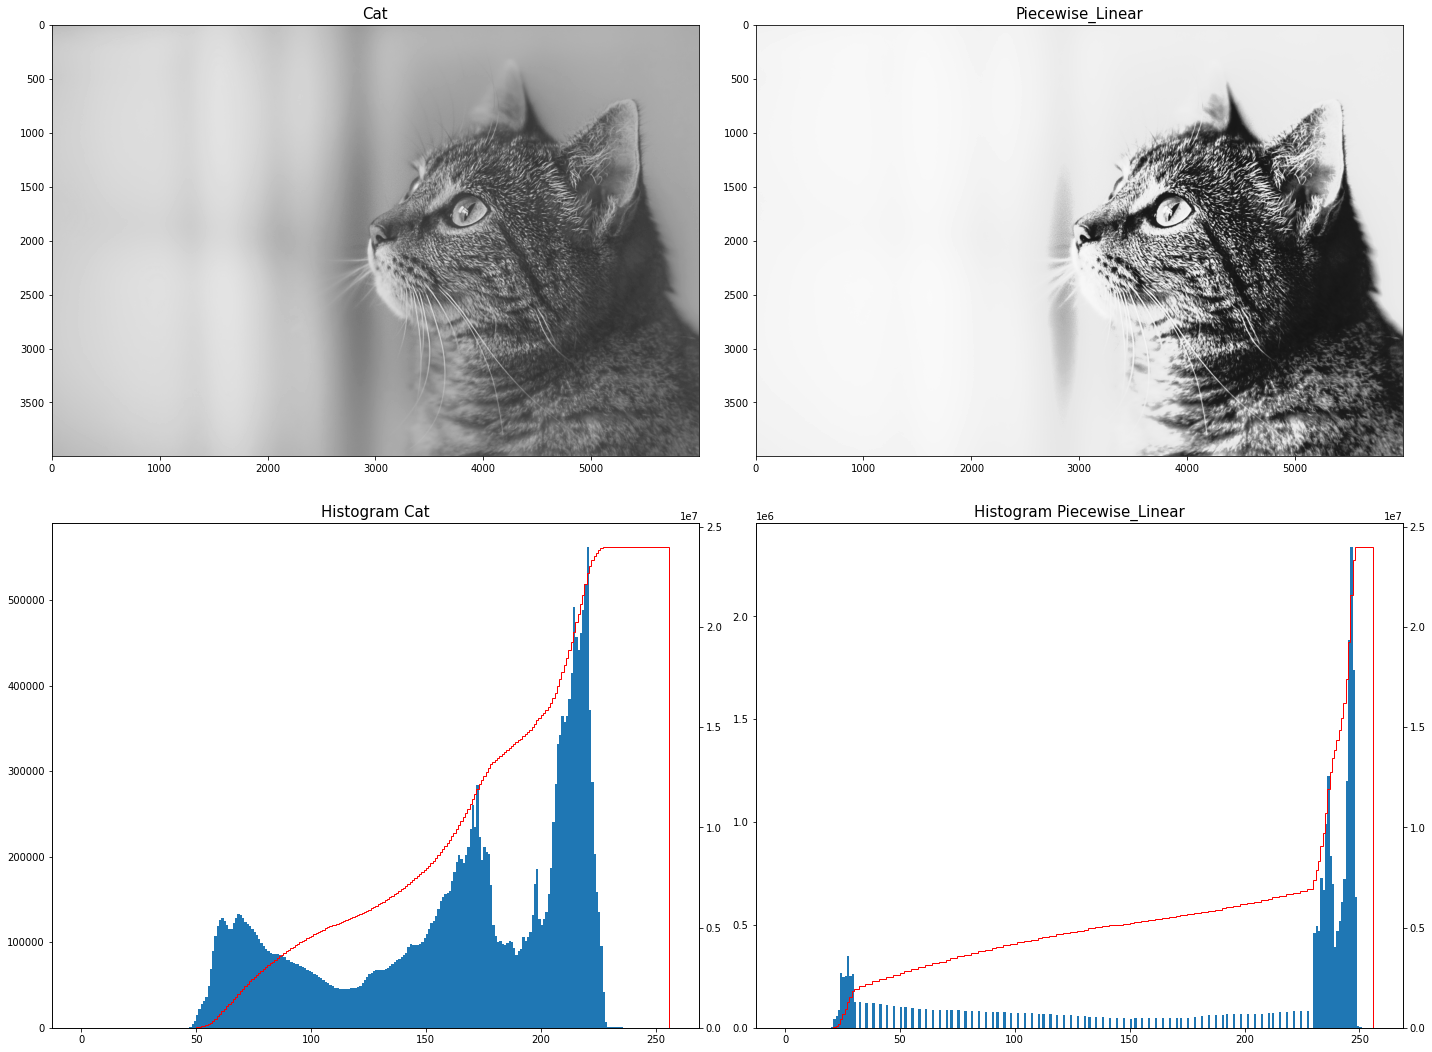

In [ ]:
def pixelval(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1)*pix
  elif (r1 < pix and pix <= r2):
    return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

r1 = 70
s1 = 30
r2 = 140
s2 = 230

pixelval_vec = np.vectorize(pixelval)
contrast_stretched = pixelval_vec(cat_gray, r1, s1, r2, s2)
visualization([cat_gray, contrast_stretched],['Cat','Piecewise_Linear'],[1,0,1])

#8 BITS PLANE SLICING

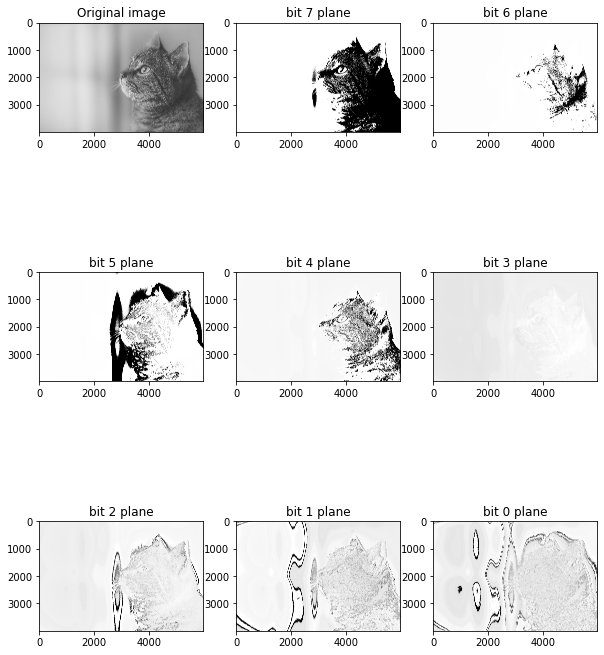

In [ ]:
bits_plan = []
for i in range(8):
  tmp = ((cat_gray >> i) & 0x00000001b) * 255
  bits_plan.append(tmp)

fig, axes = plt.subplots(3,3,figsize = (10,13))
axes[0][0].imshow(cat_gray, cmap = 'gray', vmin = 0, vmax = 255)
axes[0][0].set_title('Original image')
n,m = 0,0
for i in range(8):
  n += 1
  if n > 2:
    n = 0
    m += 1
  axes[m][n].imshow(bits_plan[7 - i], cmap = 'gray', vmin = 0, vmax = 255)
  axes[m][n].set_title('bit ' + str(7 - i)+ ' plane')
plt.show()

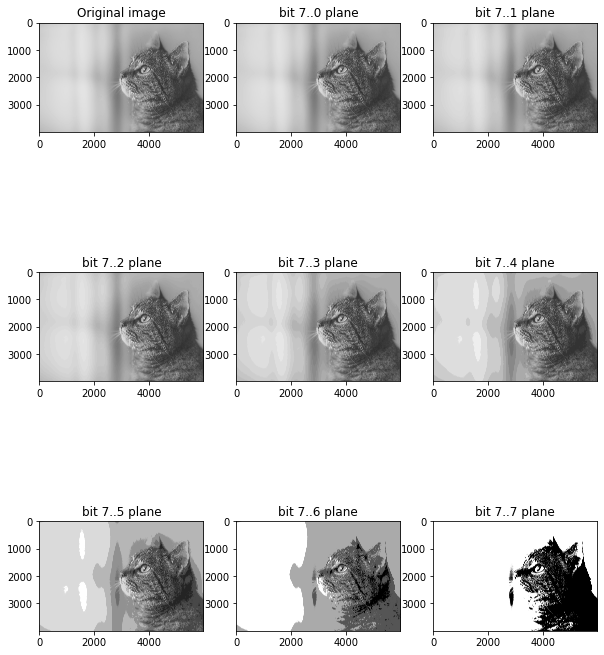

In [ ]:
bits_plan = []
for i in range(8):
  tmp = (cat_gray >> i)/(255 >> i)*255
  tmp = tmp.astype(np.uint8)
  bits_plan.append(tmp)

fig, axes = plt.subplots(3,3,figsize = (10,13))
axes[0][0].imshow(cat_gray, cmap = 'gray', vmin = 0, vmax = 255)
axes[0][0].set_title('Original image')
n,m = 0,0
for i in range(8):
  n += 1
  if  n > 2:
    n = 0
    m += 1
  axes[m][n].imshow(bits_plan[i], cmap = 'gray', vmin = 0, vmax = 255)
  axes[m][n].set_title('bit 7..' + str(i) + ' plane')
plt.show()


# Padding

In [ ]:
from skimage import transform

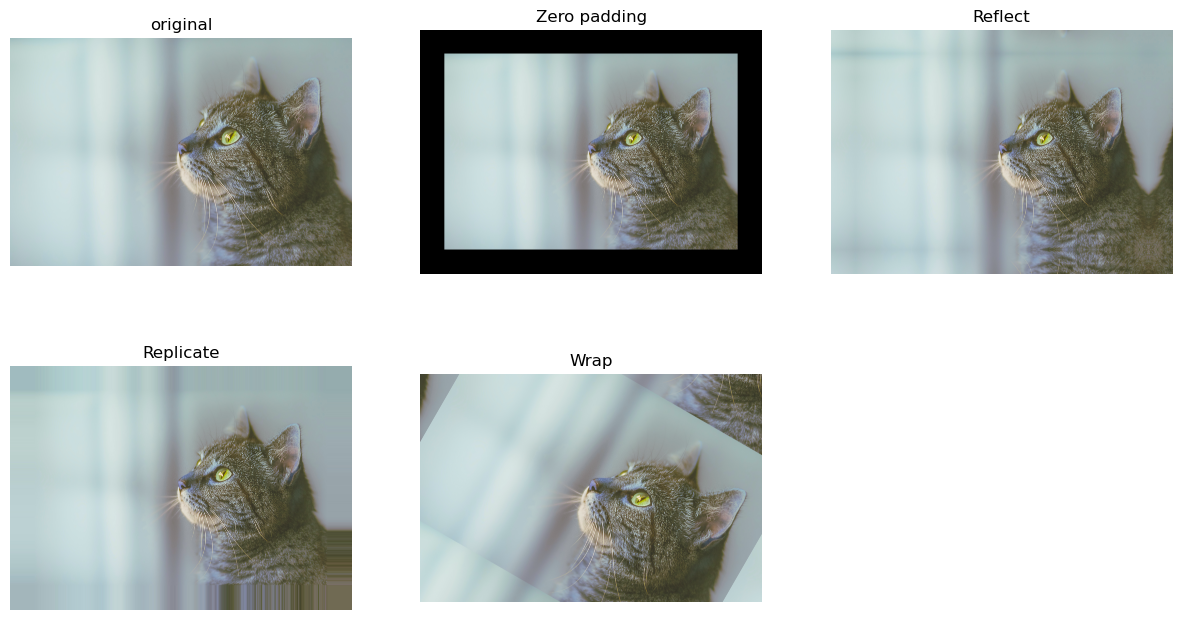

In [ ]:
# Zero padding
cat = cv2.imread('./james-sutton-dQ5G0h7sLno-unsplash.jpg')
image_zero = cv2.copyMakeBorder(cat, 500, 500, 500, 500, cv2.BORDER_CONSTANT, None, value = 0)

# Reflect padding
image_reflect = cv2.copyMakeBorder(cat, 500, 500, 500, 500, cv2.BORDER_REFLECT, None, value = 0)

# Replicate padding
image_rep = cv2.copyMakeBorder(cat, 500, 500, 500, 500, cv2.BORDER_REPLICATE, None, value = 0)

#Wrap around
wrap_img=transform.rotate(cat, 330, mode = 'wrap')

title_name = ['original', 'Zero padding', 'Reflect', 'Replicate', 'Wrap']
new_img = [cat, image_zero, image_reflect, image_rep, wrap_img]
fig= plt.figure(figsize=(15,8))
for idx, img in enumerate(new_img):
    fig.add_subplot(2, 3, idx+1)
    plt.title(title_name[idx])
    plt.imshow(img)
    plt.axis('off')
plt.show()